### Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# scipy.special for sigmoid function
import scipy.special

# visualizations
import matplotlib.pyplot
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['own-handwritten-digits', 'mnist-in-csv']


# Introduction
The MNIST-Database is a large dataset of 70.000 handwritten digits that are mainly used for training several image processing systems, especially in the deeplearning field.

The dataset consists digits from 0 to 9 in a 28x28 pixel based format. The values are stored in a comma separted file in which each row has 785 values (28x28 = 784) where every row represents a different number that is initially displayed in the first value of the row (784 + 1). 

If you are interested in the MNIST-Dataset more, you will find detailed information on Yann LeCun's website [here](http://yann.lecun.com/exdb/mnist/). Next to the dataset explanation you will find a list of benchmarks for different classifiers and pre-processing approaches that were used with this dataset.

This work here is based on the very good explanation by Tariq Rashid about neural networks, so thank you for that great work.


In [2]:
# file imports
df_mnist_test = pd.read_csv('../input/mnist-in-csv/mnist_test.csv')
df_mnist_train = pd.read_csv('../input/mnist-in-csv/mnist_train.csv')


# load the mnist train data CSV into a list
training_data_file = open('../input/mnist-in-csv/mnist_train.csv','r')
training_data_list = training_data_file.readlines()
training_data_file.close()


# load the mnist test data CSV file into a list
test_data_file = open("../input/mnist-in-csv/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()


### Test and Training Dataset Volume

In [3]:
print("Length of the train set: " + str(len(df_mnist_train)))
print("Length of the test set: " + str(len(df_mnist_test)))


Length of the train set: 60000
Length of the test set: 10000


## Visualize the Number(s)
As previously mentioned the MNIST-Dataset consists 28x28 pixel based information of digits, that are rowbased stored in a comma separated file (in this example). Therefore we need to split the values and bring them into shapes of 28x28-array to visualize and work with the "pictures".

Every field of the 28x28-array will represent a number value that is correspondent to a grey scaled color between 0 and 255.

The following will show you a reshaped(28x28) and visualized row from the CSV-file.

### Reshaped Input

In [4]:
# split the CSV-file values
all_values = training_data_list[1].split(',')

# reshape the comma seperated values into an 28 x 28 array
image_array = np.asfarray(all_values[1:]).reshape((28,28))

print(image_array)



[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

### Visualization of the 28x28-Array "Picture"

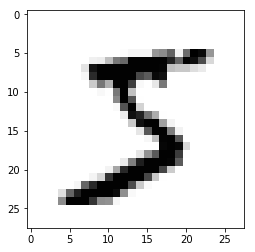

In [5]:
# visualize this 28x28 reshaped array
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In the following code snippet we are scaling of the initial values to avoid 0 and 1 calculations inside the NN.

In [6]:
# scaling of the initial array values to reduce zero calculations inside the NN.
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

# Neural Network - Detection of Handwritten Characters
In this chapter there will be the class definition for the neural network object as well as its initialization, training and testing.

## Neural Network Class Definition

In [7]:
# neural network class definition
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # link weight matrices, 
        #      wih and who
        
        # 1: mean value of the normal distribution - 0.0
        # 2: standard deviation - based on the root of nodes of the upcomming layer ->
        #     pow(self.hnodes, -0.5) --- exponent -0.5 is equal to root of 
        # 3: last param builds the grid of the array (self.hnodes, self.inodes)
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        # learning rate 
        self.lr = learningrate

        # activation function - sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    #train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hindden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging form final output layer
        final_outputs = self.activation_function(final_inputs)
        
        
        # BACKPROPAGATION #
        
        # error is the (target - actual)
        output_errors = targets - final_outputs
        
        # hidden layer error is the output_error, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass
    
    #query the neural network
    def query(self, inputs_list):
        # convert input list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calcuclate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals  into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
        

## Initialize Neural Network
##### Input Nodes
The input nodes are based on the 28x28 pixel input for every digit "picture" which makes in total 784 pixel input nodes.

##### Hidden Nodes
The number of the hidden nodes here where chosen randomly. They should not be too high or higher than the input nodes number, as we want to make the network to concentrate the values and find patterns in  inderlying levels of the input values. Just like that we do not want to choose a number too low, to avoid reducing the neural network's ability to find any feature or pattern in the input. With less hidden nodes the neural network would not be capable of creating an own understanding of the MNIST-dataset.

##### Output Nodes
The output nodes represent our targets we want to determine, the digits from 0 to 9 (10 values).

##### Learning Rate 
The learning rate is for fine-tuning and adjusting the performance of the neural network's pattern recognition and its overall accuracy. This part here is where try and error takes place.

In [8]:
# number of nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate with 0.1
learning_rate = 0.1

# create an instance of neuralnetwork
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

## Training
This chapter is about train the neural network via several executions or epochs. 

In [9]:
# train the neural network

# epochs -> the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list[1:]:

        # split the record by the ',' commas
        all_values = record.split(',')

        # scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

        # create the target output values, 
        # -> an array out of output_nodes elements (all will receive the values 0.01, ...
        targets = np.zeros(output_nodes) + 0.01

        # ... except the desired label which will be set to 0.99 here) 
        # -> all_values[0] is the target label for this record.
        targets[int(all_values[0])] = 0.99

        n.train(inputs, targets)

        pass
    pass


### Whats is Inside the Code Snippet

In [10]:
# What is Inside the Training Elements from the Training Code up there?!
# This part here is just for visualizing the values insides the single elements
# of the calculation up there, to get a better understanding what is happening in the code.
print ( "output_nodes                   ->    ", output_nodes)  
print ( "np.zeros(output_nodes) + 0.01  ->    ", np.zeros(output_nodes) + 0.01)  
print ( "targets[int(all_values[0])]    ->    ", targets[int(all_values[0])])
print ( "int(all_values[0])             ->    ", int(all_values[0]) )  


output_nodes                   ->     10
np.zeros(output_nodes) + 0.01  ->     [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
targets[int(all_values[0])]    ->     0.99
int(all_values[0])             ->     8


## Testing
First there will be a comparison between the trained neural network's result and the correct answer based on a single record. After that there will be the scorecard based testing where all results are compared with the correct values from the dataset. This will lead to the neural network's accuracy performance.

### Testrecord Visualization

In [11]:
# get the first test record
all_values = test_data_list[1].split(',')
print("Testrecord for handwritten number: " + str(all_values[0]))

Testrecord for handwritten number: 7


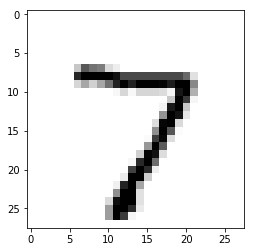

In [12]:
image_array = np.asfarray(all_values[1:]).reshape((28,28))

matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation = 'None')

### Neural Network's Testrecord Result
The result shows an array with 10 values where the highest value represents the predicted digit by corresponding array index. The array starts with 0 and ends with 9. 
The highest output value in this case is the eighth value which is the index with the number 7. The neural network's result of our testrecord seems to be correct. 

In [13]:
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.00849763],
       [0.0083959 ],
       [0.02060305],
       [0.00364157],
       [0.00276437],
       [0.00125605],
       [0.00546379],
       [0.99384994],
       [0.00419599],
       [0.00530237]])

### Test with Scorecard
This scorecard will show all comparison between the correct values and the predicted ones.

In [14]:
# test the neural network 

# scorecard for how wel the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list[1:]:
    # split the record by the ',' commas
    all_values =  record.split(',')
    
    # correct answer is first value
    correct_label = int(all_values[0])
    # print(correct_label, "correct label")
    
    # scale and shift the inputs
    inputs =  (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    # query the network
    outputs = n.query(inputs)
    
    # the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    # print(label, "network's answer")
     
    # append correct or incorrect to list
    if (label == correct_label):
        
        # network's answer matches correct answer, add 1 to scorecard 
        scorecard.append(1)
    
    else:
        # network's answer does not match correct answer, add 0 to scorecard
        scorecard.append(0)
    
    pass

### Neural Network's Performance

In [15]:
# calculate the performance score, the fraction of correct answers 
scorecard_array = np.asfarray(scorecard)
print("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9675


## Test on own handwritten digits
In this chapter I uploaded some handwritten digits to test the neural network on unknown, really new data. I created (wrote) four numbers with different interferences like a shadowed background or broken lines in the digits sign, which shall be identified correctly by the neural network. I am very interested in the results. 
Let' take a look.


In [16]:
import scipy.misc
import imageio
import glob

### Import Handwritten Digits

In [17]:
own_handwritten_digits = []


for image_file_name in glob.glob('../input/own-handwritten-digits/*.png'):
    label = int(image_file_name[-5:-4])
        
    # read picture file
    img_array =  imageio.imread(image_file_name, as_gray = True)
    
    # print(label)
    
    # the mnist-dataset pictures are stored in a contrariwise greyscale way which means 0 is white and 255 is black
    # and not as usual 0 is black and 255 is white. This leads us to the subtraction of 255 -> we make the uploaded picture equal to the rest of mnist-digits
    img_data = 255.0 - img_array.reshape(784)
       
    # rescaling the image pixels betwenn 0.01 and 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01

    record = np.append(label, img_data)
    # print(record)
    own_handwritten_digits.append(record)
    pass

### Test on own data
In this chapter, I will visualize the digits first and query the neural networks on it afterward.

#### Digit 5

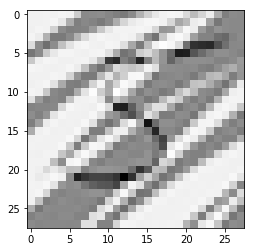

In [18]:
# visualizing handwritten digit
matplotlib.pyplot.imshow(own_handwritten_digits[0][1:].reshape(28,28), cmap='Greys', interpolation = 'None')

#### Result - Digit 5

In [19]:
# result
np.argmax(n.query(own_handwritten_digits[0][1:]))

8

#### Digit 6

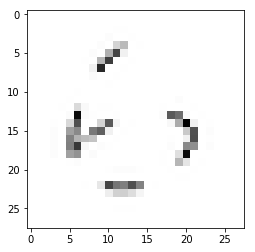

In [20]:
# visualizing handwritten digit
matplotlib.pyplot.imshow(own_handwritten_digits[1][1:].reshape(28,28), cmap='Greys', interpolation = 'None')

#### Result - Digit 6

In [21]:
# result
np.argmax(n.query(own_handwritten_digits[1][1:]))

5

#### Digit 7

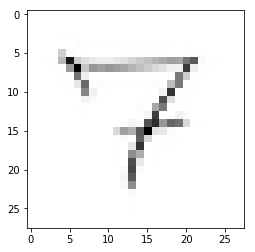

In [22]:
# visualizing handwritten digit
matplotlib.pyplot.imshow(own_handwritten_digits[3][1:].reshape(28,28), cmap='Greys', interpolation = 'None')

#### Result - Digit 7

In [23]:
# result
np.argmax(n.query(own_handwritten_digits[3][1:]))

7

#### Digit 8

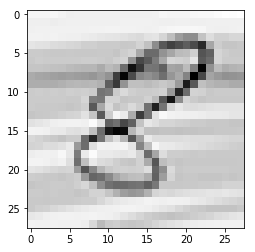

In [24]:
# visualizing first handwritten digit
matplotlib.pyplot.imshow(own_handwritten_digits[2][1:].reshape(28,28), cmap='Greys', interpolation = 'None')

#### Result - Digit 8

In [25]:
# result
np.argmax(n.query(own_handwritten_digits[2][1:]))

8

### Conclusion on Handwritten Digit Detection
Well this worked ok. The digit 7 and 8 were identified correctly. Digit 6 was very close with the result 5 but digit 5 instead was identified as an 8. It looks quite after an 8 according to the grey striped background which probably lead the neural network to that decision. The grey striped background in the digit 8 sign didn't affected the neural network in its decision, so I guess there is still a need to train the NN more :D 

I will work on this.

Thanks for reading/visiting.
